# Exponential mechanism DP

By [Armaan Bhojwani](https://armaanb.net) under [Praneeth Vepakomma](https://praneeth.mit.edu/)

This notebook features the following differentially private operations on a finite set:
- Exponential mechanism
    - Choice

### Dependencies
- tqdm
- matplotlib

### Status
- Complete

### References
- https://programming-dp.com/ch9.html

## Choosing the best country to hold a conference in
You are tasked with hosting a conference on nuclear disarmarment in, ideally, the country with the most nuclear weapons. The catch is you can't reveal which country has the most nukes. In this example, the input database is a 2x196 table with 196 countries in the first column and a triangularly distributed number of theoretical nukes in the second.

### Parameters

Epsilon is the privacy-accuracy trade-off

Sensitivity is 1 as we are essentially performing a max query on the privatized probabilities we create

In [1]:
# Privacy
epsilon = 5
sensitivity = 1

# Data
nukes_low = 0       # Minimum number of nukes a country can have
nukes_high = 10000  # Maximum number of nukes a country can have

# Analysis
max_epsilon = 10     # Largest epsilon value to test
epsilon_step = 0.25   # Step size between epsilons
num_samples = 20000  # Number of times to run lim x->inf functions

### Build the dataset

In [2]:
import numpy as np

rng = np.random.default_rng()

countries = np.loadtxt("./Data/countries.txt", dtype='str')
countries = [y.replace('_', ' ') for y in countries]
nukes_avg = (nukes_low + nukes_high) / 2
nukes = rng.triangular(nukes_low,
                       nukes_avg,
                       nukes_high,
                       size=np.shape(countries))
nukes = [round(y) for y in nukes]

x = list(zip(countries, nukes))
x.sort(key=lambda tup: tup[1], reverse=True)

print("Top 25 countries with the most nukes (non-private):")
for i, y in enumerate(x[:25]):
    print(f"{1 + i:2}: {y}")

Top 25 countries with the most nukes (non-private):
 1: ('Czech Republic', 9547)
 2: ('Dominica', 9377)
 3: ('Brunei', 9323)
 4: ('Andorra', 8885)
 5: ('Saint Vincent and the Grenadines', 8851)
 6: ('Bangladesh', 8603)
 7: ('Djibouti', 8437)
 8: ('Bhutan', 8131)
 9: ('Dominican Republic', 8119)
10: ('Japan', 8048)
11: ('Malta', 7912)
12: ('Lebanon', 7905)
13: ('Bulgaria', 7903)
14: ('Slovakia', 7850)
15: ('Belgium', 7694)
16: ('Honduras', 7677)
17: ('Cuba', 7598)
18: ('Saudi Arabia', 7534)
19: ('Equatorial Guinea', 7496)
20: ('United States of America', 7461)
21: ('New Zealand', 7398)
22: ('Turkmenistan', 7396)
23: ('Pakistan', 7348)
24: ('Somalia', 7288)
25: ('Monaco', 7267)


### Apply exponential model

In [3]:
def exponential_mech(nukes, nukes_high, epsilon):
    # Create list of privatized probabilities for each country
    nukesX = [4 * i / nukes_high for i in nukes]
    nukesX = [np.exp(epsilon * i / (2 * sensitivity)) for i in nukesX]
    nukesProb = nukesX / np.linalg.norm(nukesX, ord=1)

    # Pick a country according to the privatized probabilities
    choice = rng.choice(countries, 1, p=nukesProb)[0]
    place = [y[0] for y in x].index(choice) + 1
    
    return choice, place

choice, place = exponential_mech(nukes, nukes_high, epsilon)

print(f"Using epsilon {epsilon}, the algorithm chose {choice}, which is the " +
          f"number {place} best choice.")

Using epsilon 5, the algorithm chose Turkmenistan, which is the number 22 best choice.


### Analysis

In [4]:
from common import get_epsilons
from tqdm.notebook import tqdm

epsilons = get_epsilons(max_epsilon, epsilon_step)

data = []
for epsilon in tqdm(epsilons):
    epsilon_data = []
    for j in range(num_samples):
        _, place = exponential_mech(nukes, nukes_high, epsilon)
        
        epsilon_data.append(place)
    data.append(np.mean(epsilon_data))

  0%|          | 0/39 [00:00<?, ?it/s]

### Plotting

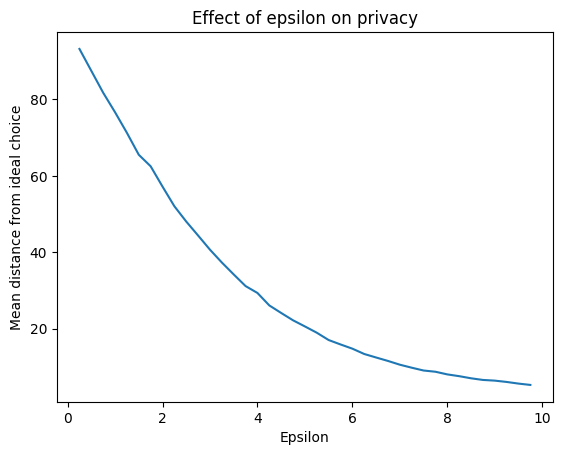

In [5]:
import matplotlib.pyplot as plt

plt.plot(epsilons, data)
plt.xlabel("Epsilon")
plt.ylabel("Mean distance from ideal choice")
plt.title("Effect of epsilon on privacy")
plt.show()